In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

address = 'D:/HomeWork/Machine Learning/ML-HW01/ML-HW01/dataset1/dataset1.csv'

df = pd.read_csv(address)
data = df.sample(frac=1)

In [2]:
#create new data for multivariate gradient descent
data['x0']=data['x']**0
data['x2']=data['x']**2
data['x3']=data['x']**3
data['x4']=data['x']**4
data['x5']=data['x']**5
data['x6']=data['x']**6
data['x7']=data['x']**7
data['x8']=data['x']**8
data['x9']=data['x']**9
data['x10']=data['x']**10

#change columns for better access
newY = data.pop('y')
x0 = data.pop('x0')

data.insert(0, 'y', newY)
data.insert(1, 'x0', x0)

#insert data in arrays
y = data.iloc[:, 0].values
X = data.iloc[:, 1:12].values

mainX = data.iloc[:,2].values

data.head(5)

,y,x0,x,x2,x3,x4,x5,x6,x7,x8,x9,x10
120,0.522129,1.0,0.450509,0.202958,0.091434,0.041192,0.018557,8.360231e-03,3.766356e-03,1.696775e-03,7.644119e-04,3.443741e-04
161,-1.107508,1.0,-0.092915,0.008633,-0.000802,0.000075,-0.000007,6.434351e-07,-5.978454e-08,5.554858e-09,-5.161276e-10,4.795581e-11
52,-0.764156,1.0,0.976748,0.954036,0.931852,0.910185,0.889021,8.683490e-01,8.481579e-01,8.284362e-01,8.091732e-01,7.903580e-01
223,-0.061440,1.0,0.596094,0.355328,0.211809,0.126258,0.075261,4.486287e-02,2.674247e-02,1.594102e-02,9.502340e-03,5.664285e-03
112,0.598958,1.0,0.398959,0.159168,0.063501,0.025334,0.010107,4.032428e-03,1.608772e-03,6.418333e-04,2.560649e-04,1.021593e-04


In [3]:
def cost_function_MSE(X, Y, theta):
 m = len(Y)
 J = np.sum((X.dot(theta)-Y) ** 2)/(2 * m)
 return J

In [4]:
def gradient_descent(X, Y , Theta , alpha , iterations , xTest , yTest  ):
    cost_history = [0] * iterations
    test_cost_history = [0] * iterations
    step_history = [0] * iterations
    m = len(Y)
 
    for iteration in range(iterations):
 # Hypothesis Values
        h = X.dot(Theta)
    
 # Difference b/w Hypothesis and Actual Y
        loss = h - Y
    
 # Gradient Calculation
        gradient = X.T.dot(loss) / m
    
 # Changing Values of B using Gradient
        Theta = Theta - alpha * gradient
        alpha = alpha - 0.000003
    
 # New Cost Value
        cost = cost_function_MSE(X, Y, Theta)
        cost_history[iteration] = cost
        test_cost_history[iteration] = cost_function_MSE(xTest, yTest, Theta)
        step_history[iteration] = alpha * gradient
 
    return Theta, cost_history , test_cost_history , step_history

In [5]:
#60% of data for train
#40% of data for test
m = 180

X_train = X[:m]
mainX_train = X[:m , 1]
y_train = y[:m]

X_test = X[m: , 1]
xTest = X[m:]
y_test = y[m:]

In [6]:
# Initial Coefficients
Theta = np.zeros(X_train.shape[1])

alpha = 0.9
iter_ = 5000

newTheta, cost_history , test_cost_history , step_history = gradient_descent(X_train, y_train, Theta, alpha, iter_ , xTest , y_test )

print(newTheta)

[ -0.10639667   3.45719382   1.65258553 -12.74693076  -0.80313385
   4.12881788   0.26445266   4.90705575   0.45409851  -0.20845438
  -0.20440493]


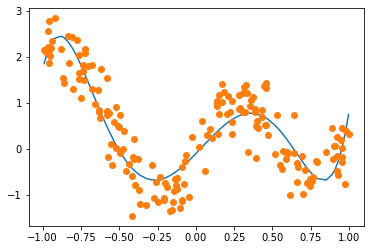

In [7]:
# plot
sorted_X_train = np.sort(mainX_train)
# sorted_X_train = mainX_train
y_predict = [None] * len(sorted_X_train)

for i in range(len(sorted_X_train)):
    y_predict[i] = newTheta[0]+ newTheta[1]*sorted_X_train[i] + newTheta[2]*(sorted_X_train[i]**2) + newTheta[3]*(sorted_X_train[i]**3) + newTheta[4]*(sorted_X_train[i]**4) + newTheta[5]*(sorted_X_train[i]**5)+ newTheta[6]*(sorted_X_train[i]**6) + newTheta[7]*(sorted_X_train[i]**7) + newTheta[8]*(sorted_X_train[i]**8)+ newTheta[9]*(sorted_X_train[i]**9) + newTheta[10]*(sorted_X_train[i]**10)


plt.plot(sorted_X_train,y_predict)
plt.plot(mainX_train,y_train , linestyle='', marker='o')

plt.show()

In [8]:
#test
def pred(testData , Thetas):
    y_predict = [None] * len(testData)
    for i in range(len(testData)):
        y_predict[i] = Thetas[0]+ Thetas[1]*testData[i] + Thetas[2]*(testData[i]**2) + Thetas[3]*(testData[i]**3) + Thetas[4]*(testData[i]**4) + Thetas[5]*(testData[i]**5)+ Thetas[6]*(testData[i]**6) + Thetas[7]*(testData[i]**7) + Thetas[8]*(testData[i]**8)+ Thetas[9]*(testData[i]**9) + Thetas[10]*(testData[i]**10)
    
    return (y_predict)

In [9]:
def r2(y_,y):
    sst = np.sum((y-y.mean())**2)
    ssr = np.sum((y_-y)**2)
    r2 = 1-(ssr/sst)
    return(abs(r2))

In [10]:
y_ = pred(X_test,newTheta)

In [11]:
r2(y_,y_test)

0.8147994230309419

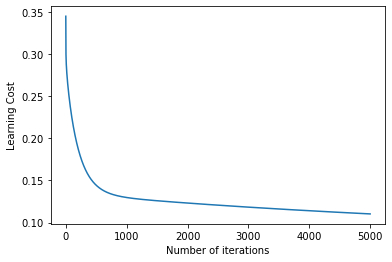

In [12]:
# Plot the convergence graph for learning cost
plt.plot(np.arange(iter_), cost_history)
plt.xlabel('Number of iterations')
plt.ylabel('Learning Cost')
plt.show()

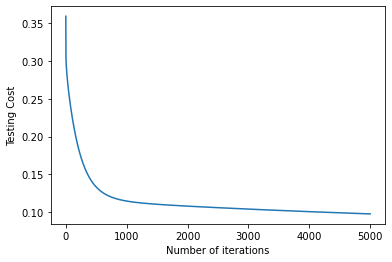

In [13]:
# Plot the convergence graph for testing cost
plt.plot(np.arange(iter_), test_cost_history)
plt.xlabel('Number of iterations')
plt.ylabel('Testing Cost')
plt.show()

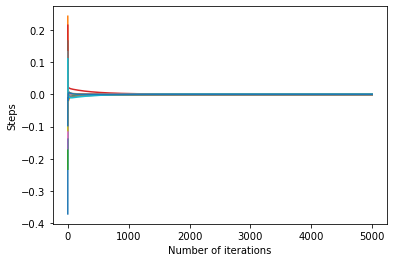

In [15]:
# Plot the convergence graph for thetas Step
plt.plot(np.arange(iter_), step_history)
plt.xlabel('Number of iterations')
plt.ylabel('Steps')
plt.show()